Nama Kelompok:
1.   Alviatul Nazila (202010370311293)
2.   Clarissa Sanindita Reikisyifa (202010370311232)

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = '/content/drive/MyDrive/combine_data_proses.csv'
df = pd.read_csv(url)

In [ ]:
df

,emoticon,convert_emoji,translate_emoji,cleaned,tokenize,normalization,stemmed,stopwords_stemmed,text_string_stemmed,label
0,@DPP_PKB @cakimiNOW Cak Imin sangat berkarisma...,Cak Imin sangat berkarismatik ....memang cocok...,Cak Imin sangat berkarismatik ....memang cocok...,cak imin sangat berkarismatik memang cocok men...,"['cak', 'imin', 'sangat', 'berkarismatik', 'me...","['cak', 'imin', 'sangat', 'berkarismatik', 'me...","['cak', 'imin', 'sangat', 'karismatik', 'meman...","['cak', 'imin', 'karismatik', 'cocok', 'dampin...",cak imin karismatik cocok damping anis,positive
1,@Adiprayitno_20 lho...lho gak bahaya tah kalau...,lho...lho gak bahaya tah kalau cawapres juga d...,lho...lho gak bahaya tah kalau cawapres juga d...,lholho gak bahaya tah kalau cawapres juga diun...,"['lholho', 'gak', 'bahaya', 'tah', 'kalau', 'c...","['lholho', 'gak', 'bahaya', 'tah', 'kalau', 'c...","['lholho', 'gak', 'bahaya', 'tah', 'kalau', 'c...","['lholho', 'gak', 'bahaya', 'cawapres', 'undan...",lholho gak bahaya cawapres undang makan siang,negative
2,@FandiFrezian @sasbudiarjo @kikysaputrii Karna...,Karna posisinya pak Anis masih jadi Gubernur D...,Karna posisinya pak Anis masih jadi Gubernur D...,karna posisinya pak anis masih jadi gubernur d...,"['karna', 'posisinya', 'pak', 'anis', 'masih',...","['karena', 'posisinya', 'pak', 'anis', 'masih'...","['karena', 'posisi', 'pak', 'anis', 'masih', '...","['anis', 'gubernur', 'dki', 'cak', 'imin', 'da...",anis gubernur dki cak imin dateng lapor cawapr...,positive
3,Cak Imin Tak Khawatir Yenny Dukung Ganjar-Mahf...,Cak Imin Tak Khawatir Yenny Dukung Ganjar-Mahf...,Cak Imin Tak Khawatir Yenny Dukung Ganjar-Mahf...,cak imin tak khawatir yenny dukung ganjarmahfu...,"['cak', 'imin', 'tak', 'khawatir', 'yenny', 'd...","['cak', 'imin', 'tak', 'khawatir', 'yenny', 'd...","['cak', 'imin', 'tak', 'khawatir', 'yenny', 'd...","['cak', 'imin', 'khawatir', 'yenny', 'dukung',...",cak imin khawatir yenny dukung ganjarmahfud su...,neutral
4,Susi Pudjiastuti Dikabarkan Masuk Calon Kapten...,Susi Pudjiastuti Dikabarkan Masuk Calon Kapten...,Susi Pudjiastuti Dikabarkan Masuk Calon Kapten...,susi pudjiastuti dikabarkan masuk calon kapten...,"['susi', 'pudjiastuti', 'dikabarkan', 'masuk',...","['susi', 'pudjiastuti', 'dikabarkan', 'masuk',...","['sus', 'pudjiastuti', 'kabar', 'masuk', 'calo...","['sus', 'pudjiastuti', 'kabar', 'calon', 'kapt...",sus pudjiastuti kabar calon kapten timnas mena...,positive
...,...,...,...,...,...,...,...,...,...,...
3001,@kasrulsani9 @Cintada16 @Leonita_Lestari Prof ...,Prof pak Mahfud MD kok di LAWAN grinning_face ...,Prof pak Mahfud MD kok di LAWAN wajah menyerin...,prof pak mahfud md kok di lawan wajah menyerin...,"['prof', 'pak', 'mahfud', 'md', 'kok', 'di', '...","['prof', 'pak', 'mahfud', 'md', 'kok', 'di', '...","['prof', 'pak', 'mahfud', 'md', 'kok', 'di', '...","['prof', 'mahfud', 'lawan', 'seringai', 'serin...",prof mahfud lawan seringai seringai bergulingg...,positive
3002,"@Melihat_Indo Alhamdulillah, semakin yakin kem...","Alhamdulillah, semakin yakin kemenangan Ganjar...","Alhamdulillah, semakin yakin kemenangan Ganjar...",alhamdulillah semakin yakin kemenangan ganjar ...,"['alhamdulillah', 'semakin', 'yakin', 'kemenan...","['alhamdulillah', 'semakin', 'yakin', 'kemenan...","['alhamdulillah', 'makin', 'yakin', 'menang', ...","['menang', 'ganjar', 'mahfud', 'semangat']",menang ganjar mahfud semangat,positive
3003,@gus_dibyo Pak Bas sosok yg berkarakter kuat d...,"Pak Bas sosok yg berkarakter kuat dan hebat, I...","Pak Bas sosok yg berkarakter kuat dan hebat, I...",pak bas sosok yg berkarakter kuat dan hebat in...,"['pak', 'bas', 'sosok', 'yg', 'berkarakter', '...","['pak', 'bas', 'sosok', 'yg', 'berkarakter', '...","['pak', 'bas', 'sosok', 'yg', 'karakter', 'kua...","['sosok', 'karakter', 'kuat', 'hebat', 'insyaa...",sosok karakter kuat hebat insyaallah ganjar ma...,positive
3004,@Gus_Raharjo Indonesia harus di pimpin oleh or...,Indonesia harus di pimpin oleh orang yg bener2...,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   emoticon             3006 non-null   object
 1   convert_emoji        3004 non-null   object
 2   translate_emoji      3004 non-null   object
 3   cleaned              3004 non-null   object
 4   tokenize             3006 non-null   object
 5   normalization        3006 non-null   object
 6   stemmed              3006 non-null   object
 7   stopwords_stemmed    3006 non-null   object
 8   text_string_stemmed  2999 non-null   object
 9   label                3006 non-null   object
dtypes: object(10)
memory usage: 235.0+ KB


# Preprocessing

In [ ]:
df.isnull().sum()

emoticon               0
convert_emoji          2
translate_emoji        2
cleaned                2
tokenize               0
normalization          0
stemmed                0
stopwords_stemmed      0
text_string_stemmed    7
label                  0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['label'].value_counts()

positive    1546
negative     727
neutral      726
Name: label, dtype: int64

# Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

Spliting Data Train and Data Test

In [ ]:
X = df[['text_string_stemmed']]
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Inisialisasi vektorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')


Ubah teks menjadi vektor TF-IDF

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['text_string_stemmed'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['text_string_stemmed'])

Membangun model decision tree

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_tfidf, y_train)


DecisionTreeClassifier()

Classification report

In [ ]:
from sklearn.metrics import classification_report

y_pred = dt_classifier.predict(X_test_tfidf)

classification_rep = classification_report(y_test, y_pred)

print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

    negative       0.56      0.48      0.52       163
     neutral       0.54      0.58      0.56       142
    positive       0.80      0.83      0.82       295

    accuracy                           0.68       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.67      0.68      0.68       600



Confusion Matrix

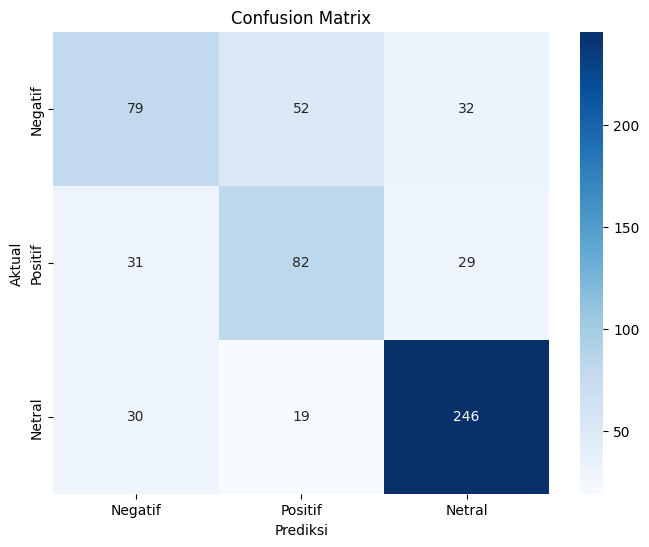

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = dt_classifier.predict(X_test_tfidf)

cm = confusion_matrix(y_test, y_pred)

class_labels = ['Negatif', 'Positif', 'Netral']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()
